In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [118]:
sample_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [119]:
sample_data.head(6)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247


In [120]:
train_data=train_data.set_index('Id')

In [121]:
test_data.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [122]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [123]:
train_data.shape

(1460, 80)

In [124]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [125]:
test_data.shape

(1459, 80)

In [126]:
train_data['TotalArea']=train_data['1stFlrSF']+train_data['2ndFlrSF']+train_data['TotalBsmtSF']
features=['TotalArea','BedroomAbvGr','FullBath', 'HalfBath','SalePrice']
train_df=train_data[features]

In [127]:
test_data['TotalArea']=test_data['1stFlrSF']+test_data['2ndFlrSF']+test_data['TotalBsmtSF']
features=['TotalArea','BedroomAbvGr','FullBath', 'HalfBath']
test_df=test_data[features]


In [128]:
train_df.head()

,TotalArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
Id,,,,,
1,2566,3,2,1,208500
2,2524,3,2,0,181500
3,2706,3,2,1,223500
4,2473,3,1,0,140000
5,3343,4,2,1,250000


In [129]:
test_df.head()

,TotalArea,BedroomAbvGr,FullBath,HalfBath
0,1778.0,2,1,0
1,2658.0,3,1,1
2,2557.0,3,2,1
3,2530.0,3,2,1
4,2560.0,2,2,0


In [130]:
train_df.isnull().sum()

TotalArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [131]:
test_df.isnull().sum()

TotalArea       1
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64

In [148]:
test_df['TotalArea'].fillna(test_df['TotalArea'].mean(),inplace=True)

/tmp/ipykernel_32/914783222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['TotalArea'].fillna(test_df['TotalArea'].mean(),inplace=True)


In [133]:
test_df.isnull().sum()  ## Null values filling

TotalArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64

In [134]:
### Splitting the data into training and tesing set
x_train=train_df[['TotalArea','BedroomAbvGr','FullBath', 'HalfBath']]
y_train=train_df['SalePrice']
x_test=test_df[['TotalArea','BedroomAbvGr','FullBath', 'HalfBath']]

Training the model

In [141]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)

In [142]:
y_predict

array([118470.32857928, 180205.55748622, 203575.74716657, ...,
       127824.4201548 , 107614.24485555, 233095.4175369 ])

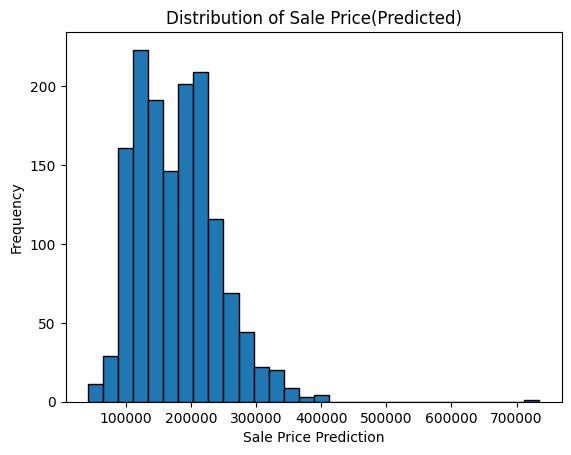

In [150]:
import matplotlib.pyplot as plt
plt.hist(y_predict,bins=30,edgecolor='black')
plt.xlabel('Sale Price Prediction')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price(Predicted)')
plt.show()